# Data Visualization with Haberman Dataset

Dataset Description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Source: Kaggle: https://www.kaggle.com/gilsousa/habermans-survival-data-set/home

Column Descriptions:
1. age    - age of the patient at the time of surgery
2. year   - year of surgery
3. nodes  - no. of positive axilliary nodes detected
4. status - survival status (1 - patient survived 5 years or longer, 2 - patient died within 5 years)

Source: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

Dataset Objective: Classification - Given a new patient's datapoint predict their survival status as 1 or 2.

## Load and Explore the Dataset

In [106]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
%matplotlib inline

# Read the csv file into a pandas DataFrame
data = pd.read_csv('haberman.csv')

# Read the first 10 rows of the dataset
data.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [107]:
print("Dataset Information:\n")
print(data.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [108]:
# Number of Datapoints and Number of Features:
print("Number of Datapoints: " + str(data.shape[0]) + "\n" + "Number of Features: " + str(data.shape[1]) + "\n")

# Column Names in the dataset:
print("Column Names: " + str(', '.join(data.columns)) + "\n")

# No. of classes:
print("No. of Classes: " + str(data.status.nunique()) + "\n")

# No. of datapoints per class:
print("No. of datapoints per class: \n" + str(data.status.value_counts()) + "\n")

# No. of Null Values:
print("No. of non-null values: \n" + str(data.count()))

Number of Datapoints: 306
Number of Features: 4

Column Names: age, year, nodes, status

No. of Classes: 2

No. of datapoints per class: 
1    225
2     81
Name: status, dtype: int64

No. of non-null values: 
age       306
year      306
nodes     306
status    306
dtype: int64


#### Observations:
> 1. There are no null values. So missing value treatments Not Required.
> 2. Predictor Variables (Independant Variables): age, year, nodes
> 3. Target Variable (Dependant Variable): status
> 4. 'status' variable has values as 1 - those who survived & 2 - those who did not survive. Instead we shall convert them to more typical class labels for a binary classification problem: That is, 1 - those who survived & 0 - those who did not survive.
> 5. Similary, the target variable 'status' should be a categorical variable and not int64.


In [109]:
# Convert the class labels in 'status' column to 1 - those who survived and 0 - those who did not survive

data['status'] = data['status'].map({1:1, 2:0}, na_action='ignore')

data['status'].value_counts()

1    225
0     81
Name: status, dtype: int64

In [110]:
# Convert the 'status' column from int64 to category
data['status'] = data['status'].astype('category')

data.dtypes


age          int64
year         int64
nodes        int64
status    category
dtype: object

In [111]:
# Statistical Summary:

print("\nStatistical Summary for the Predictor Variables:")
data.describe()


Statistical Summary for the Predictor Variables:


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [112]:
# Balanced vs. Imbalanced Data

data['status'].value_counts(normalize = True)

1    0.735294
0    0.264706
Name: status, dtype: float64

#### Observations:
> We have 73.5% of positive class data and 26.5% of negative class data. So we can conclude that the dataset is Imbalanced.

## Univariate Analysis

### Type of Analysis:
> 1. For Quantitative Variables : Histogram, PDF, CDF, Box Plot, Violin Plot
> 2. For Qualitative Variables : Barchart, Frequency Tables

#### Quantitative (Continous) Variables:
> 1. age 
> 2. nodes
#### Qualitative (Categorical) Variables:
> None


### Histogram & PDF:

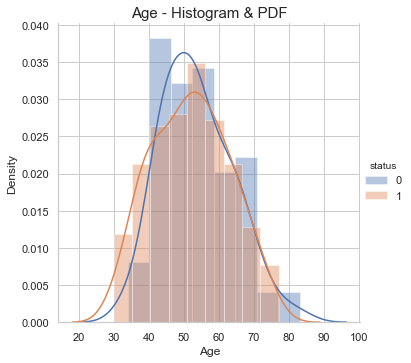

In [113]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Age - Histogram & PDF", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show();

We can see there is complete overlap between the age distributions of those who survived and those who did not. Therefore the feature 'age' alone is not sufficient to distinguish between the 2 classes.

Also, we can observe that in the age group 30-40, the risk of death within 5 years is not much prominent.
But in the age group 40-50, the risk of death is significantly higher than the previous age group.
Whereas, the rate of survival remains almost the same rate between the two age groups of 30-40 and 40-50 - there is no significant increase or decrease.

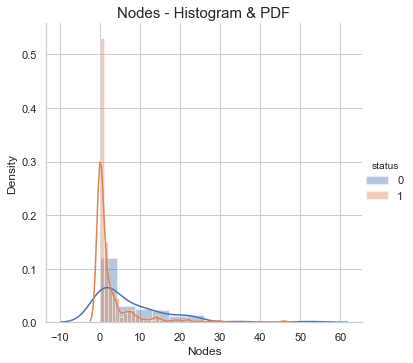

In [114]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Nodes - Histogram & PDF", fontsize = 15)
plt.xlabel("Nodes")
plt.ylabel("Density")
plt.show();

We can see there is complete overlap between the node distributions of those who survived and those who did not. Therefore the feature 'nodes' alone is not sufficient to distinguish between the 2 classes.

Also, we can observe that those with number of axillary positive nodes <=2 (approximately), had better survival rate than those with higher number of axillary nodes.

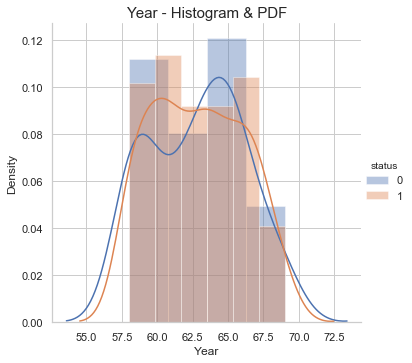

In [128]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Year - Histogram & PDF", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Density")
plt.show();


In [129]:
pd.crosstab(data.year, data.status)

status,0,1
year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


We can see there is complete overlap between the year distributions of those who survived and those who did not. Therefore the feature 'year' alone is not sufficient to distinguish between the 2 classes.

Also, we can observe that the no. of patients who did not survive reached the peak during the years '58 and '65. This can be clearly seen from the contingency table above. Year '58 had 12 and year '65 had 13 deaths. The no. of survivals on the other hand remained almost constan throughout.

### PDF & CDF:

In [116]:
# Divide the dataset into 2 subsets based on the status:
data_status_1 = data[data.status == 1]
data_status_0 = data[data.status == 0]

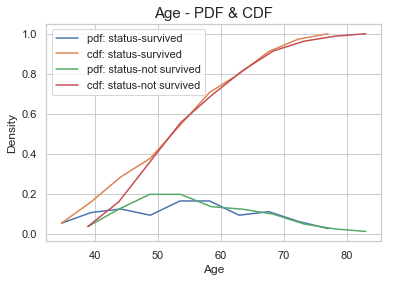

In [117]:
label = ["pdf: status-survived", "cdf: status-survived", "pdf: status-not survived", "cdf: status-not survived"]
counts, bin_edges = np.histogram(data_status_1['age'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_status_0['age'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("Age - PDF & CDF",fontsize=15)
plt.ylabel("Density")
plt.xlabel("Age")
plt.legend(label)
plt.show()

From the CDF Curves we can observe that:
40% of those who survived is < age 50years. Less than 10% of those who did not survive belong to the age group < 40 years.

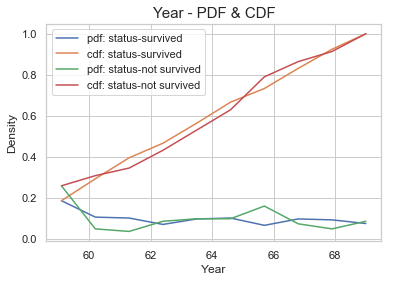

In [118]:
label = ["pdf: status-survived", "cdf: status-survived", "pdf: status-not survived", "cdf: status-not survived"]
counts, bin_edges = np.histogram(data_status_1['year'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_status_0['year'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("Year - PDF & CDF",fontsize=15)
plt.ylabel("Density")
plt.xlabel("Year")
plt.legend(label)
plt.show()

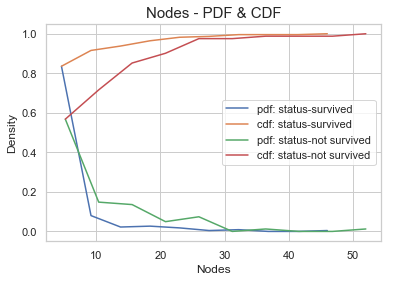

In [119]:
label = ["pdf: status-survived", "cdf: status-survived", "pdf: status-not survived", "cdf: status-not survived"]
counts, bin_edges = np.histogram(data_status_1['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(data_status_0['nodes'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("Nodes - PDF & CDF",fontsize=15)
plt.ylabel("Density")
plt.xlabel("Nodes")
plt.legend(label)
plt.show()

Form the CDF we can observe that 90% of those who survived had fewer than 10 nodes. From the corresponding PDF we can see that after the 10 node mark, irrespective of the number of nodes the survival rate is almost constant.
Also, 90% of those that did not survive had 20 or fewer no. of nodes. This can also be observed from the corresponding CDF.

### Median, Quantiles, Percentiles, MAD:

In [131]:
#Median, Quantiles, Percentiles, MAD.

for var in list(data.columns)[:3]:
    print("\nFeature: " + str(var) + "\n")
    print(pd.DataFrame([(np.median(data_status_1[var]), np.median(data_status_0[var])),(np.percentile(data_status_1[var],np.arange(0, 100, 25)), np.percentile(data_status_0[var],np.arange(0, 100, 25))),(np.percentile(data_status_1[var],90), np.percentile(data_status_0[var],90)),(robust.mad(data_status_1[var]), robust.mad(data_status_0[var]))], columns = ['survived', 'did not survive'], index = ['Median', 'Quantiles', '90th Percentiles', 'MAD']))




Feature: age

                                  survived           did not survive
Median                                  52                        53
Quantiles         [30.0, 43.0, 52.0, 60.0]  [34.0, 46.0, 53.0, 61.0]
90th Percentiles                        67                        67
MAD                                13.3434                   11.8608

Feature: year

                                  survived           did not survive
Median                                  63                        63
Quantiles         [58.0, 60.0, 63.0, 66.0]  [58.0, 59.0, 63.0, 65.0]
90th Percentiles                        67                        67
MAD                                4.44781                   4.44781

Feature: nodes

                              survived        did not survive
Median                               0                      4
Quantiles         [0.0, 0.0, 0.0, 3.0]  [0.0, 1.0, 4.0, 11.0]
90th Percentiles                     8                     20
MAD           

In the CDF plot's observation we had noted two points: "90% of those who survived had fewer than 10 nodes" and "90% of those that did not survive had 20 or fewer no. of nodes". These two can be seen clearly from the table displayed for Feature: nodes. 

From the table displayed for Feature: age, we can see that the spread given by MAD, is a bit higher for the survived. This means that the PDF of age is a little more spread around the median than the PDF for those that did not survive. This can be seen from the corresponding Histogram-PDF plots.

### Box Plots:

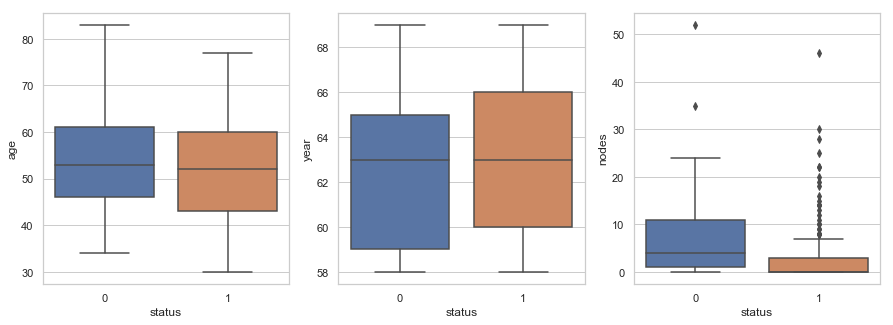

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for id_, var in enumerate(list(data.columns)[:3]):
    sns.boxplot( x='status', y=var, data=data, ax=axes[id_])
plt.show()


The Box Plots show a visual representation of the output of the previous cell where we computed median, quantiles and MAD. In addition, in the 3rd box plot for the 'nodes' feature, we can find several outliers. Among those who did not survive, 2 persons had more than 35 nodes. And among those who survived, those that had more than 5 nodes, are considered outliers.

### Violin Plots:

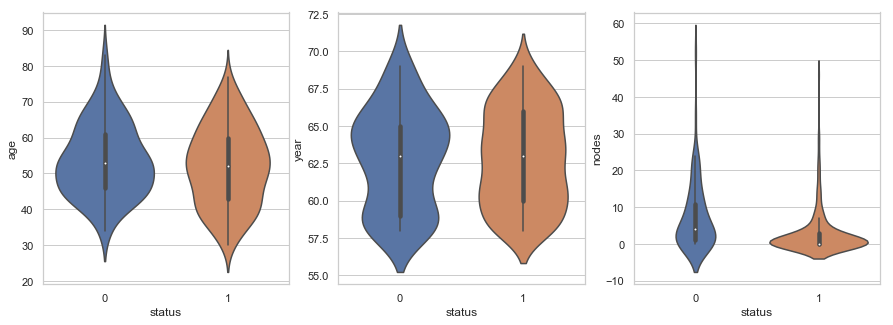

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for id_, var in enumerate(list(data.columns)[:3]):
    sns.violinplot( x='status', y=var, data=data, ax=axes[id_])
plt.show()



## Bivariate Analysis:
### Scatter Plots:

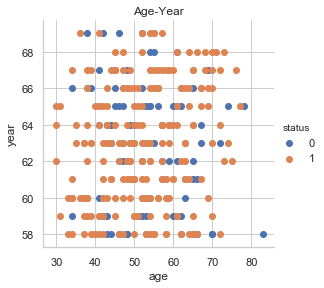

In [102]:
sns.set_style("whitegrid");
sns.FacetGrid(data ,hue="status",size=4).map(plt.scatter,"age","year").add_legend();
plt.title("Age-Year")
plt.show()

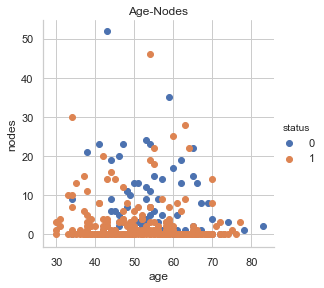

In [103]:
sns.set_style("whitegrid");
sns.FacetGrid(data ,hue="status",size=4).map(plt.scatter,"age","nodes").add_legend();
plt.title("Age-Nodes")
plt.show()

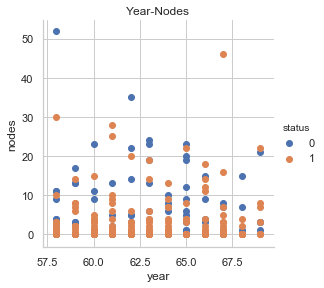

In [104]:
sns.set_style("whitegrid");
sns.FacetGrid(data ,hue="status",size=4).map(plt.scatter,"year","nodes").add_legend();
plt.title("Year-Nodes")
plt.show()

### Pair Plots:

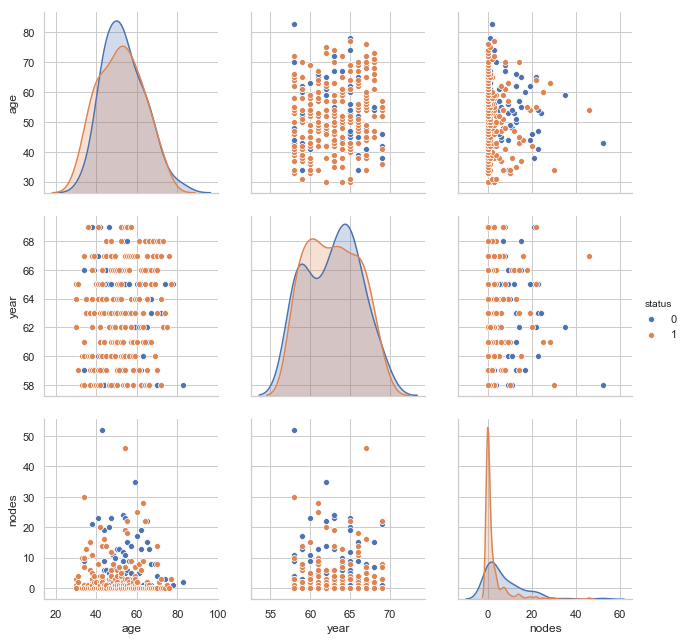

In [105]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="status",vars=['age','year','nodes'],size=3);
plt.show()

### Correlation:

In [133]:
# Pearson's Correlation Coefficient between the features:

data.corr(method='pearson')

,age,year,nodes
age,1.000000,0.089529,-0.063176
year,0.089529,1.000000,-0.003764
nodes,-0.063176,-0.003764,1.000000


### Contour Plot:

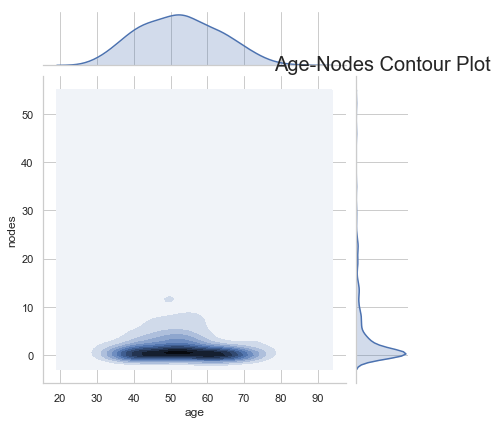

In [136]:
sns.jointplot(x = "age", y = "nodes", data = data, kind = "kde")
plt.title("Age-Nodes Contour Plot", fontsize = 20)
plt.show()

### Observations:
From the scatter plots we can observe that, the age-year scatter plot and the year-nodes scatter plot don't seem to help much in separating the 2 classes: survived and did not survive. Whereas, the age-nodes scatter plot seem to be of interest with the 'age' attribute following an approximately symmetrical normal distribution and the 'nodes' attribute following a  right skewed distribution. This can be seen in the 2D Contour plot above. 

Also from the contour plot we can see that almost all the datapoints have the number of axillary positive nodes less than 10.

From the correlation matrix we can see that no two variables have strong correlation.

From the Exploratory Analysis we can conclude that we did not find any single feature of importance. We should therefore use all the 3 features {age, nodes, year} towards building the model.